Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 


### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.


## 19. Beginning Deep Learning - Convolution Networks - Tensorflow

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# In the notebooks on Pandas, Matplotlib and Scaling
#   04 - Beginning Pandas <br>
#   05 - Beginning Matplotlib <br>
#   06 - Beginning Data Scaling <br>
# we loaded our dataset such as
df_conn = pd.read_csv(r'df_conn_with_labels.csv', index_col=0)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.000000,0,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


This file represents Zeek (formerly Bro) connection log - conn.log`. 
Zeek is a framework used for Network Security Monitoring. 
This entire series is based on using Zeek's data. 
The majority of the notebooks use the conn.log
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html

In [3]:
# Drop the port column
df_conn = df_conn.drop(columns=['id.resp_p'], inplace=False)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,0.000000,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
4,0.000000,0,0,0,0,0,0,0
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


In [4]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) \
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  \
                                & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) \
                                    & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
7,0.054294,208,977,6,528,6,1297,0
8,0.424980,227,791633,176,9387,174,367737,0
9,0.272567,227,406607,171,9127,71,169939,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


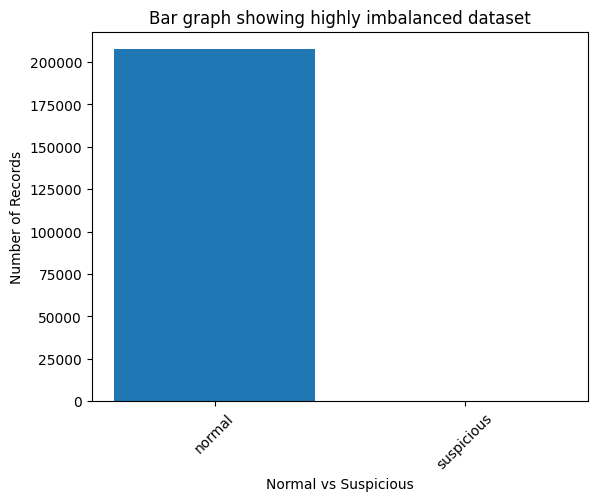

In [5]:
# The graph below shows this dataset is highly imbalanced.
# As a result, using measures like accuracy is more than likely not the best approach, 
# to understand how well our eventual model has "learned"
# via the training data
plt.title('Bar graph showing highly imbalanced dataset')
plt.bar(x=['normal', 'suspicious'], height=[ df_conn[df_conn.label == 0].shape[0], df_conn[df_conn.label == 1].shape[0] ])
plt.ylabel(ylabel='Number of Records')
plt.xlabel(xlabel='Normal vs Suspicious')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Getting the percentage of samples that are considered suspicious in this dataset
# This is going to be quite a challenge for this learning algorithm
(df_conn[df_conn.label == 1].shape[0] / df_conn.shape[0]) * 100

0.032272359446649454

In [7]:
# Drop the label column
X_data = df_conn.drop(columns=['label'], inplace=False)
X_data

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


In [8]:
# Extract the labels to be used for classification
y_label = df_conn.label
y_label

5          0
6          0
7          0
8          0
9          0
          ..
4430183    0
4430184    0
4430185    0
4430186    0
4430187    0
Name: label, Length: 207608, dtype: int64

In [9]:
# prepare to split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data.values, y_label, test_size=0.2, train_size=0.8, \
                                                    stratify=y_label, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [11]:
# Scaling the data first
# import the scaler library
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Setup the scaler for classification
# We learned about scaling in noebook
#   06 - Beginning Data Scaling
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the classification training data
min_max_scaler.fit(X_train)

# Transform the train data
X_train_scaled = min_max_scaler.transform(X_train)
X_train_scaled, X_train_scaled.shape

(array([[2.63072563e-07, 9.18795041e-08, 7.10178687e-08, ...,
         3.59579942e-07, 1.75013957e-06, 3.05765612e-07],
        [3.61672231e-07, 5.89415687e-08, 2.38314996e-08, ...,
         2.75234030e-07, 1.75013957e-06, 1.34744168e-07],
        [2.79225614e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        ...,
        [1.68135854e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        [1.65133428e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        [3.49932746e-07, 7.80108997e-08, 8.38868784e-08, ...,
         3.24065874e-07, 1.75013957e-06, 3.52407824e-07]]),
 (166086, 7))

In [13]:
# Scale the classification test data
X_test_scaled = min_max_scaler.transform(X_test)
X_test_scaled

array([[1.73484676e-05, 3.90054499e-07, 8.33234064e-04, ...,
        7.60578166e-05, 6.94805411e-04, 1.16707452e-03],
       [5.08070521e-07, 6.41422953e-08, 5.29059290e-08, ...,
        2.88551805e-07, 1.75013957e-06, 2.40121018e-07],
       [4.43809598e-06, 2.05948775e-06, 1.84884774e-05, ...,
        9.69534066e-06, 5.60044664e-05, 6.65187043e-05],
       ...,
       [5.47522398e-07, 6.41422953e-08, 8.96064383e-08, ...,
        2.88551805e-07, 1.75013957e-06, 3.73137696e-07],
       [1.83147984e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.95094010e-07, 0.00000000e+00, 0.00000000e+00]])

In [14]:
# import PCA to leverage dimensionality reduction
from sklearn.decomposition import PCA

In [15]:
# Setup PCA to use 3 principal Components
# We learned about PCA in notebook
#   07 - Beginning Principal Component Analysis (PCA)
pca = PCA(n_components=3, random_state=10)
pca

PCA(n_components=3, random_state=10)

In [16]:
# Fit on the X_train
pca.fit(X_train_scaled)

# transform the training data
X_train_pca = pca.transform(X_train)
X_train

array([[8.7620e-03, 5.3000e+01, 1.4900e+02, ..., 8.1000e+01, 1.0000e+00,
        1.7700e+02],
       [1.2046e-02, 3.4000e+01, 5.0000e+01, ..., 6.2000e+01, 1.0000e+00,
        7.8000e+01],
       [9.3000e-05, 0.0000e+00, 0.0000e+00, ..., 5.2000e+01, 1.0000e+00,
        4.0000e+01],
       ...,
       [5.6000e-05, 0.0000e+00, 0.0000e+00, ..., 5.2000e+01, 1.0000e+00,
        4.0000e+01],
       [5.5000e-05, 0.0000e+00, 0.0000e+00, ..., 5.2000e+01, 1.0000e+00,
        4.0000e+01],
       [1.1655e-02, 4.5000e+01, 1.7600e+02, ..., 7.3000e+01, 1.0000e+00,
        2.0400e+02]])

In [17]:
# Use the opportunity to PCA transform the X_test classification data
X_test_pca = pca.transform(X_test_scaled)
X_test_pca

array([[ 0.00134937,  0.000691  , -0.0008094 ],
       [-0.00025832, -0.00023494, -0.0004764 ],
       [-0.00018612, -0.00015918, -0.0004979 ],
       ...,
       [-0.00025824, -0.00023488, -0.00047639],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025896, -0.0002359 , -0.00047662]])

In [18]:
# To get this data ready for a Conv1D layer, needs to change the number of dimensions
# Currently the dataset has 2 dimensions
X_train_pca.ndim

2

In [19]:
# We need it to be at least 3 dimensions. 
# Let's reshape to get those 3 dimensions
X_train_pca = [ np.array(i, ndmin=2) for i in X_train_pca ]
X_train_pca = np.asarray(X_train_pca)
#X_train = tf.convert_to_tensor(X_train)

# Make sure the batch size is consistent with the number of labels
# The shape of X_train is batch_size, rows, columns
X_train_pca.shape, y_train.shape

((166086, 1, 3), (166086,))

In [20]:
# Get a snapshot of the data
X_train_pca[:5]

array([[[203.31473264,  28.87316928, -21.4083181 ]],

       [[ 81.89942381,  27.78036302, -13.04165797]],

       [[ 21.37263823,  32.52786996, -10.8044498 ]],

       [[158.14281612, 199.18874327, -60.60034298]],

       [[  7.4882963 ,  12.36079447,  -3.41223427]]])

In [21]:
# Import tensorflow
import tensorflow as tf

In [22]:
# Before building this 1D convolution model, let's get an understanding of what 1D convolution is.
# Define an array
#x_tmp = np.array([1,2,3,4,5,6,7,8,9], ndmin=3, dtype=float)
x_tmp = tf.constant(value=[1,2,3,4,5], shape=(1,1,5), dtype=tf.float32, name='constant_tensor')
x_tmp

<tf.Tensor: shape=(1, 1, 5), dtype=float32, numpy=array([[[1., 2., 3., 4., 5.]]], dtype=float32)>

In [23]:
# Define a 1D convolution
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

# Ensure at initialization, the kernel/weights/filter values are the same every time
tf.keras.utils.set_random_seed(10)

# Build a convolution layer note, I'm using same here vs 'valid' in the PyTorch notebook
# ""same" results in padding with zeros evenly to the left/right or up/down of the input 
#    such that output has the same height/width dimension as the input"
# 20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
conv_layer = tf.keras.layers.Conv1D(filters=1, kernel_size=1, strides=1, padding='same',  \
                                    activation=None, use_bias=False)

# Apply the convolution to the data
conv_output = conv_layer(x_tmp)

# View the conv1d output
conv_output

<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[1.8760896]]], dtype=float32)>

In [24]:
# The weights and the kernel are the same values
conv_layer.weights, conv_layer.kernel

([<tf.Variable 'conv1d/kernel:0' shape=(1, 5, 1) dtype=float32, numpy=
  array([[[ 0.6689315 ],
          [-0.9253168 ],
          [ 0.8339906 ],
          [ 0.01773524],
          [ 0.0969758 ]]], dtype=float32)>],
 <tf.Variable 'conv1d/kernel:0' shape=(1, 5, 1) dtype=float32, numpy=
 array([[[ 0.6689315 ],
         [-0.9253168 ],
         [ 0.8339906 ],
         [ 0.01773524],
         [ 0.0969758 ]]], dtype=float32)>)

In [25]:
# We can further confirm this is true 
conv_layer.kernel == conv_layer.weights

<tf.Tensor: shape=(1, 1, 5, 1), dtype=bool, numpy=
array([[[[ True],
         [ True],
         [ True],
         [ True],
         [ True]]]])>

In [26]:
# Once again, review the input and the kernel
x_tmp, conv_layer.kernel

(<tf.Tensor: shape=(1, 1, 5), dtype=float32, numpy=array([[[1., 2., 3., 4., 5.]]], dtype=float32)>,
 <tf.Variable 'conv1d/kernel:0' shape=(1, 5, 1) dtype=float32, numpy=
 array([[[ 0.6689315 ],
         [-0.9253168 ],
         [ 0.8339906 ],
         [ 0.01773524],
         [ 0.0969758 ]]], dtype=float32)>)

In [27]:
# Compute the convolution operation by multiplying the input by the kernel and adding the values up
# This value is the same as seen above from conv_output
(1 * 0.6689315 ) + (2 * -0.9253168 ) + (3 * 0.8339906 ) + (4 * 0.01773524 ) + (5 * 0.0969758 ), conv_output.numpy()

(1.87608966, array([[[1.8760896]]], dtype=float32))

In [28]:
# Alternatively for a more simplistic view, reshape both input and kernel to rank 1 tensors
x_tmp.numpy().flatten(), tf.reshape(conv_layer.kernel, -1)

(array([1., 2., 3., 4., 5.], dtype=float32),
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([ 0.6689315 , -0.9253168 ,  0.8339906 ,  0.01773524,  0.0969758 ],
       dtype=float32)>)

In [29]:
# Now find the dot product of these
np.dot(x_tmp.numpy().flatten(), tf.reshape(conv_layer.kernel, -1))

1.8760896

In [30]:
# The value above, is the exact value from our convolution output
conv_output.numpy()

array([[[1.8760896]]], dtype=float32)

In [31]:
# Ensure the model training is repeatable
tf.keras.utils.set_random_seed(90)

# Build the model using the functional API
input_layer = tf.keras.layers.Input(shape=X_train_pca.shape[1:], name='input_layer', dtype=tf.float32)

# If the default padding of 'valid' is use we encounter an error about 
x = tf.keras.layers.Conv1D(filters=1, kernel_size=1, strides=1, padding='valid', name='conv_hidden')(input_layer)

# Setup a 1D MaxPool layer
x = tf.keras.layers.MaxPool1D(pool_size=2, padding='same', name='max_poold')(x)

# Flatten the layers before transitioning to a dense layer
x = tf.keras.layers.Flatten(name='flatten_layer')(x)

# Leverage the dense layer and make a binary classification
x = tf.keras.layers.Dense(units=1, activation='sigmoid', name='dense_output')(x)

# Construct the model
conv1d_model = tf.keras.Model(inputs=input_layer, outputs=x)

# Get the model summary
conv1d_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1, 3)]            0         
                                                                 
 conv_hidden (Conv1D)        (None, 1, 1)              4         
                                                                 
 max_poold (MaxPooling1D)    (None, 1, 1)              0         
                                                                 
 flatten_layer (Flatten)     (None, 1)                 0         
                                                                 
 dense_output (Dense)        (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


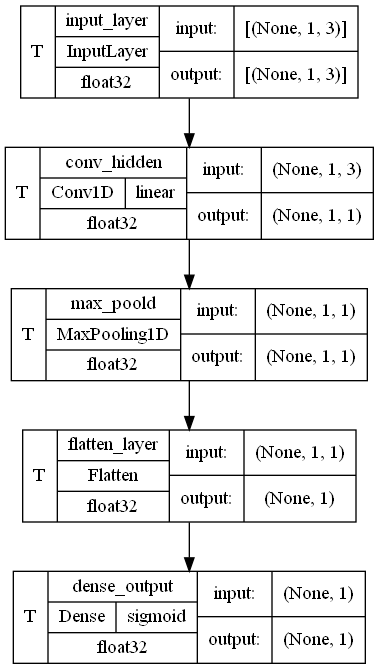

In [32]:
# Graph the model
tf.keras.utils.plot_model(model=conv1d_model, to_file='conv1d_functional_model.png', show_dtype=True, \
                          show_layer_activations=True, show_layer_names=True, show_shapes=True, show_trainable=True)

In [33]:
# Get the model submodules
conv1d_model.submodules

(<keras.engine.input_layer.InputLayer at 0x1fe00181030>,
 <keras.layers.reshaping.flatten.Flatten at 0x1fe01361e70>)

In [34]:
# Find all layers
# https://www.tensorflow.org/guide/intro_to_modules
[ layer for layer in conv1d_model.layers ]

In [35]:
# Find all layers output
[ layer.output for layer in conv1d_model.layers ]

[<KerasTensor: shape=(None, 1, 3) dtype=float32 (created by layer 'input_layer')>,
 <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'conv_hidden')>,
 <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'max_poold')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'flatten_layer')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_output')>]

In [36]:
# Take a look at the layer variables
[ layer.variables for layer in conv1d_model.layers ]

[[],
 [<tf.Variable 'conv_hidden/kernel:0' shape=(1, 3, 1) dtype=float32, numpy=
  array([[[-0.9994949 ],
          [ 0.3309089 ],
          [-0.25070262]]], dtype=float32)>,
  <tf.Variable 'conv_hidden/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>],
 [],
 [],
 [<tf.Variable 'dense_output/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.40184677]], dtype=float32)>,
  <tf.Variable 'dense_output/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]]

In [37]:
# Find all trainable variables in the layers.
# FIn this case all the variables are trainable
[ layer.trainable_variables for layer in conv1d_model.layers ]

[[],
 [<tf.Variable 'conv_hidden/kernel:0' shape=(1, 3, 1) dtype=float32, numpy=
  array([[[-0.9994949 ],
          [ 0.3309089 ],
          [-0.25070262]]], dtype=float32)>,
  <tf.Variable 'conv_hidden/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>],
 [],
 [],
 [<tf.Variable 'dense_output/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.40184677]], dtype=float32)>,
  <tf.Variable 'dense_output/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]]

In [38]:
# Get the model weights
# you should notice that this is the same as layer variables and layer trainable variables
conv1d_model.get_weights()

[array([[[-0.9994949 ],
         [ 0.3309089 ],
         [-0.25070262]]], dtype=float32),
 array([0.], dtype=float32),
 array([[0.40184677]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
# Compile the model
conv1d_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(), 'accuracy'])

In [40]:
# Train the model
# Notice to address teh class imbalance of the data, I have also assigned class_weight
conv1d_model.fit(x=X_train_pca, y=y_train, epochs=5, verbose=1, validation_split=0.2, class_weight={0:1, 1:1000})

Epoch 1/5
4153/4153 [==============================] - 13s 3ms/step - loss: 245417.1094 - recall: 0.0000e+00 - accuracy: 0.7865 - val_loss: 390.3182 - val_recall: 0.0000e+00 - val_accuracy: 0.4840
Epoch 2/5
4153/4153 [==============================] - 12s 3ms/step - loss: 131292.2031 - recall: 0.0244 - accuracy: 0.4329 - val_loss: 206.7811 - val_recall: 0.0000e+00 - val_accuracy: 0.3856
Epoch 3/5
4153/4153 [==============================] - 11s 3ms/step - loss: 79260.4922 - recall: 0.4390 - accuracy: 0.3869 - val_loss: 116.0749 - val_recall: 0.2308 - val_accuracy: 0.4155
Epoch 4/5
4153/4153 [==============================] - 12s 3ms/step - loss: 42660.9336 - recall: 0.5122 - accuracy: 0.5260 - val_loss: 46.2213 - val_recall: 0.2308 - val_accuracy: 0.8758
Epoch 5/5
4153/4153 [==============================] - 11s 3ms/step - loss: 7138.0459 - recall: 0.4634 - accuracy: 0.9133 - val_loss: 0.4902 - val_recall: 0.2308 - val_accuracy: 0.9974


In [41]:
# Define the callbacks
# Also save the model as we go. This is helpful if training on a very large dataset
# Also reduce the learning rate when metric has stopped improving
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
callbacks = [ 
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min', \
                                                 restore_best_weights=True, verbose=1), 
                tf.keras.callbacks.ModelCheckpoint(filepath=r'.', monitor='val_loss', verbose=1, \
                                                   save_best_only=True, save_weights_only=False, \
                                                    save_freq='epoch', mode='min'),
                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode='min', \
                                                     min_lr=0., min_delta=0.001, verbose=1)
              ]

In [42]:
# Get the model history
conv1d_model.history.history

{'loss': [245417.109375,
  131292.203125,
  79260.4921875,
  42660.93359375,
  7138.0458984375],
 'recall': [0.0,
  0.024390242993831635,
  0.4390243887901306,
  0.5121951103210449,
  0.46341463923454285],
 'accuracy': [0.7864798307418823,
  0.43290331959724426,
  0.386932909488678,
  0.5259656310081482,
  0.9132522344589233],
 'val_loss': [390.31817626953125,
  206.7811279296875,
  116.07493591308594,
  46.22126388549805,
  0.4901879131793976],
 'val_recall': [0.0,
  0.0,
  0.23076923191547394,
  0.23076923191547394,
  0.23076923191547394],
 'val_accuracy': [0.48404479026794434,
  0.38563430309295654,
  0.41552773118019104,
  0.8758203387260437,
  0.9974110126495361]}

In [43]:
# How did our algorithm perform
print(conv1d_model.history.history)

{'loss': [245417.109375, 131292.203125, 79260.4921875, 42660.93359375, 7138.0458984375], 'recall': [0.0, 0.024390242993831635, 0.4390243887901306, 0.5121951103210449, 0.46341463923454285], 'accuracy': [0.7864798307418823, 0.43290331959724426, 0.386932909488678, 0.5259656310081482, 0.9132522344589233], 'val_loss': [390.31817626953125, 206.7811279296875, 116.07493591308594, 46.22126388549805, 0.4901879131793976], 'val_recall': [0.0, 0.0, 0.23076923191547394, 0.23076923191547394, 0.23076923191547394], 'val_accuracy': [0.48404479026794434, 0.38563430309295654, 0.41552773118019104, 0.8758203387260437, 0.9974110126495361]}


In [44]:
# A cleaner view
pd.DataFrame(conv1d_model.history.history)

,loss,recall,accuracy,val_loss,val_recall,val_accuracy
0,245417.109375,0.000000,0.786480,390.318176,0.000000,0.484045
1,131292.203125,0.024390,0.432903,206.781128,0.000000,0.385634
2,79260.492188,0.439024,0.386933,116.074936,0.230769,0.415528
3,42660.933594,0.512195,0.525966,46.221264,0.230769,0.875820
4,7138.045898,0.463415,0.913252,0.490188,0.230769,0.997411


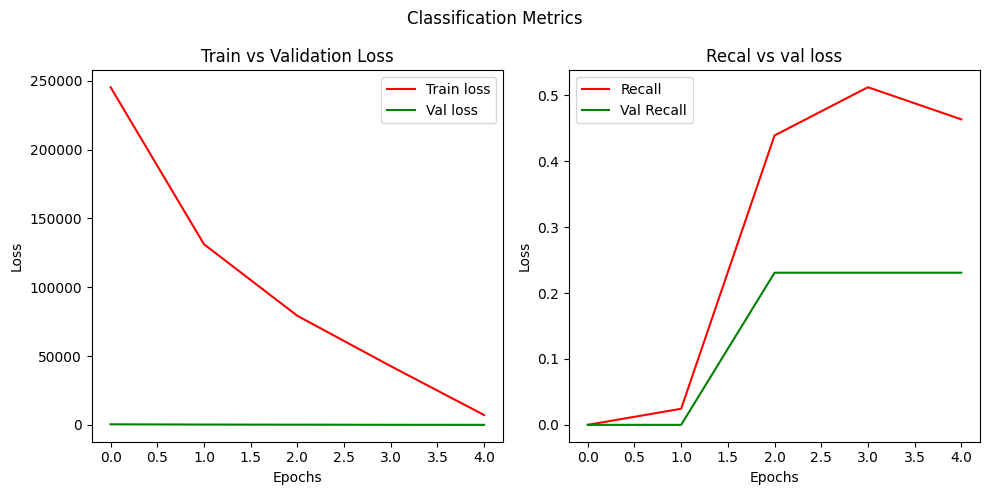

In [45]:
# plot the loss and accuracy
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# We can see from below the loss has decreased while the accuracy has increased.
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
plt.suptitle('Classification Metrics')

ax[0].plot(conv1d_model.history.history['loss'], 'r', conv1d_model.history.history['val_loss'], 'g' )
ax[0].set_title('Train vs Validation Loss')
ax[0].legend(labels=['Train loss', 'Val loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(conv1d_model.history.history['recall'], 'r', conv1d_model.history.history['val_recall'], 'g' )
ax[1].set_title('Recal vs val loss')
ax[1].legend(labels=['Recall', 'Val Recall'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.tight_layout()

plt.show()

In [46]:
# We need to make the test data at least 3 dimensions, just as we did with the training data. 
# Let's reshape to get those 3 dimensions
X_test_pca = [ np.array(i, ndmin=2) for i in X_test_pca ]
X_test_pca = np.asarray(X_test_pca)

# Make sure the batch size is consistent with the number of labels
X_test_pca.shape, y_test.shape

((41522, 1, 3), (41522,))

In [47]:
# Evaluate the model on the test data
results = conv1d_model.evaluate(x=X_test_pca, y=y_test)
results

1298/1298 [==============================] - 2s 2ms/step - loss: 0.2097 - recall: 0.0000e+00 - accuracy: 0.9997


[0.20971904695034027, 0.0, 0.9996868968009949]

In [48]:
# Review the evaluation metrics fro a different perspective
dict(zip(conv1d_model.metrics_names, results))

{'loss': 0.20971904695034027, 'recall': 0.0, 'accuracy': 0.9996868968009949}

In [49]:
# Create a sample x for prediction
new_sample = np.array(pca.transform(min_max_scaler.transform(np.array([7110, 1124942, 16527, 1873, 1251154, 1695, 112731], \
                                                                      ndmin=2))), ndmin=3)
new_sample

array([[[0.01396942, 0.06439457, 0.2026917 ]]])

In [50]:
# Make a prediction
# If the prediction is greater than 0.5 then this sample is suspicious
# Else it is normal
conv1d_model.predict(x=new_sample)

1/1 [==============================] - 0s 148ms/step


array([[0.18881309]], dtype=float32)

In [51]:
# Make predictions on the test data
predictions = conv1d_model.predict(x=X_test_pca)
predictions

1298/1298 [==============================] - 2s 2ms/step


array([[0.18882097],
       [0.18882097],
       [0.18882097],
       ...,
       [0.18882097],
       [0.18882097],
       [0.18882097]], dtype=float32)

In [52]:
# Get the shape of the predictions
predictions.shape, y_test.shape

((41522, 1), (41522,))

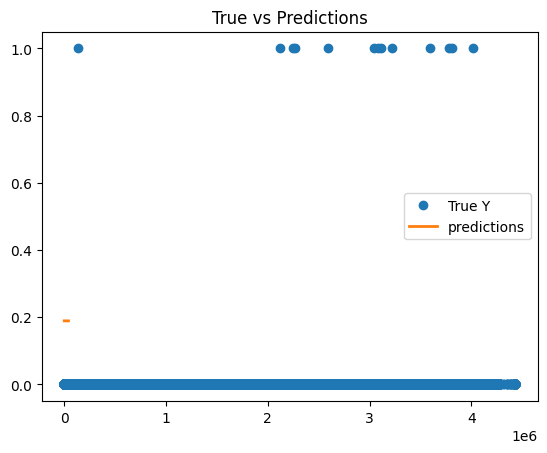

In [53]:
# Above confirms this model is terrible. 
plt.title('True vs Predictions')
plt.plot(y_test, linestyle='', marker='o', label='True Y')
plt.plot(predictions, ls='-', lw=2, label='predictions')
plt.legend(loc='best')


In [54]:
# Above confirms the model is terrible
# import some metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
# Grabbing the accuracy score
# Note, we cannot just get the predictions as this would proeduce continuous values
# Imagine the model is reporting 99% accuracy. 
# Accuracy is misleading here
accuracy_score(y_true=y_test, y_pred=np.round(predictions))

0.9996869129618033

In [56]:
# Print classification report
print(classification_report(y_true=y_test, y_pred=np.round(predictions)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41509
           1       0.00      0.00      0.00        13

    accuracy                           1.00     41522
   macro avg       0.50      0.50      0.50     41522
weighted avg       1.00      1.00      1.00     41522



C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [57]:
# import seaborn
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns

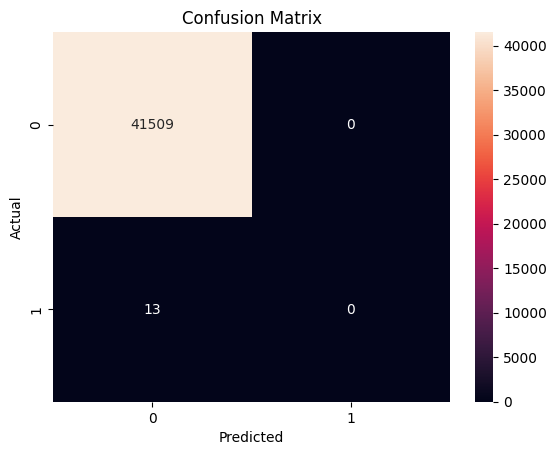

In [58]:
# Looking at the confusion matrix, clearly this model has way too much false positives
# Maybe we can do a better job at setting a different threshold
# However, as said above, we are here for learning purposes
# Most importantly, we are not attempting to solve a classification problem
# This is just to give us insights into what our threshold looks like at present
# To learn more about these metrics see notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=np.round(predictions)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
# This model is a model I can live with.
# Primary reason being it flagged the majority of the samples as non-issue. 
# At the same time, I can live with the 9 false negatives
# In this context, the hope is I can find these 9 via threat hunting

# we may need to reload at a later time
# https://www.tensorflow.org/guide/keras/save_and_serialize
# https://www.tensorflow.org/tutorials/keras/save_and_load
conv1d_model.save(filepath='./conv1d.h5', overwrite=True)

!dir *.h5 /b

conv1d.h5


In [60]:
# Prepare to save the model
import os

In [61]:
# Create the path
PATH = './SAVED_MODELS/TF_CONV_1D/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [62]:
# Save the model weights
conv1d_model.save_weights(filepath=f'{PATH}./conv1d-weights.h5', overwrite=True)
!dir *.h5 /b

conv1d.h5


In [63]:
# Before attempting to take advantage of conv2d layer, we need to reshape our data.
# Keep in mind our data currently is a 1d vector
X_train[0]

array([8.762e-03, 5.300e+01, 1.490e+02, 1.000e+00, 8.100e+01, 1.000e+00,
       1.770e+02])

In [64]:
# The shape is 1*3
X_train[0].shape

(7,)

In [65]:
# For this convolution we need to reshape this data. 
# Setting up a new PCA this time with 4 dimensions
X_data = df_conn.drop(columns=['label'], inplace=False)
X_data

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


In [66]:
# Get the labels (again. Did not need to, but ...)
y_label = df_conn.label
y_label

5          0
6          0
7          0
8          0
9          0
          ..
4430183    0
4430184    0
4430185    0
4430186    0
4430187    0
Name: label, Length: 207608, dtype: int64

In [67]:
# Split the data into train and test
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data.values, y_label, test_size=0.2, \
                                                    train_size=0.8, stratify=y_label, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [68]:
# Setup the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the training data
min_max_scaler.fit(X_train)

# Transform the data
X_train_scaled = min_max_scaler.transform(X_train)

# Transform the test data
X_test_scaled = min_max_scaler.transform(X_test)

In [69]:
# Setup PCA with 4 principal components
pca = PCA(n_components=4)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_train_pca

array([[-2.58281486e-04, -2.34968361e-04, -4.76652709e-04,
         3.60448930e-05],
       [-2.58390230e-04, -2.35020471e-04, -4.76526754e-04,
         3.60380283e-05],
       [-2.58464066e-04, -2.35151244e-04, -4.76858412e-04,
         3.59983123e-05],
       ...,
       [-2.58464121e-04, -2.35151552e-04, -4.76859477e-04,
         3.59983308e-05],
       [-2.58464122e-04, -2.35151561e-04, -4.76859506e-04,
         3.59983313e-05],
       [-2.58257388e-04, -2.34936547e-04, -4.76574090e-04,
         3.60015654e-05]])

In [70]:
# Extracting 1 sample, we see it is shaped 1,4
X_train_pca[0], X_train_pca[0].shape

(array([-2.58281486e-04, -2.34968361e-04, -4.76652709e-04,  3.60448930e-05]),
 (4,))

In [71]:
# Let's reshape this to 2*2
X_train_pca[0].reshape(2,2)

array([[-2.58281486e-04, -2.34968361e-04],
       [-4.76652709e-04,  3.60448930e-05]])

In [72]:
# With he understanding of what is needed to reshape the data, time to do the same for all samples
# We need to make the test data at least 3 dimensions, just as we did with the training data. 
# Let's reshape to get those 3 dimensions
X_train_pca = [ np.array(i, ndmin=3).reshape(2,2) for i in X_train_pca ]
X_train_pca = np.asarray(X_train_pca)

# Make sure the batch size is consistent with the number of labels
X_train_pca.shape, y_train.shape

((166086, 2, 2), (166086,))

In [73]:
# With the data reshaped, taking a look at one sample
X_train_pca[0]

array([[-2.58281486e-04, -2.34968361e-04],
       [-4.76652709e-04,  3.60448930e-05]])

In [74]:
# Transform the test data to 4 principal components
X_test_pca = pca.transform(X_test_scaled)
X_test_pca[0]

array([ 0.00134937,  0.000691  , -0.0008094 , -0.00031127])

In [75]:
# With he understanding of what is needed to reshape the data, time to do the same for all samples
# We need to make the test data at least 3 dimensions, just as we did with the training data. 
# Let's reshape to get those 3 dimensions
X_test_pca = [ np.array(i, ndmin=3).reshape(2,2) for i in X_test_pca ]
X_test_pca = np.asarray(X_test_pca)

# Make sure the batch size is consistent with the number of labels
X_test_pca.shape, y_test.shape

((41522, 2, 2), (41522,))

In [76]:
# I'm not going into the basics of the calculating for conv2d as it was already done for conv1d
# while 1d and 1d are different, the concept for the calculation remains the same
# Hence no need to walk through this again

In [77]:
# Trying a 2d convolution
# Ensure the model training is repeatable
tf.keras.utils.set_random_seed(90)

# Build the model using the functional API
input_layer = tf.keras.layers.Input(shape=(2,2,1), name='input_layer', dtype=tf.float32)

# If the default padding of 'valid' is use we encouter an error about 
x = tf.keras.layers.Conv2D(filters=1, kernel_size=1, strides=1, padding='same', name='conv_hidden')(input_layer)
x = tf.keras.layers.MaxPool2D(padding='same', name='max_poold')(x)
x = tf.keras.layers.Flatten(name='flatten_layer')(x)
x = tf.keras.layers.Dense(units=1, activation='sigmoid', name='dense_output')(x)
conv2d_model = tf.keras.Model(inputs=input_layer, outputs=x)
conv2d_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2, 2, 1)]         0         
                                                                 
 conv_hidden (Conv2D)        (None, 2, 2, 1)           2         
                                                                 
 max_poold (MaxPooling2D)    (None, 1, 1, 1)           0         
                                                                 
 flatten_layer (Flatten)     (None, 1)                 0         
                                                                 
 dense_output (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the model
conv2d_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(), 'accuracy'])

In [79]:
# Train the model
conv2d_model.fit(x=X_train_pca, y=y_train, epochs=5, verbose=1, validation_split=0.2, class_weight={0:1, 1:1000})

Epoch 1/5
4153/4153 [==============================] - 13s 3ms/step - loss: 0.7791 - recall_1: 0.0000e+00 - accuracy: 0.9994 - val_loss: 0.3446 - val_recall_1: 0.0000e+00 - val_accuracy: 0.9996
Epoch 2/5
4153/4153 [==============================] - 11s 3ms/step - loss: 0.7210 - recall_1: 0.0000e+00 - accuracy: 0.9997 - val_loss: 0.2836 - val_recall_1: 0.0000e+00 - val_accuracy: 0.9996
Epoch 3/5
4153/4153 [==============================] - 10s 2ms/step - loss: 0.7189 - recall_1: 0.0000e+00 - accuracy: 0.9997 - val_loss: 0.2751 - val_recall_1: 0.0000e+00 - val_accuracy: 0.9996
Epoch 4/5
4153/4153 [==============================] - 15s 3ms/step - loss: 0.7182 - recall_1: 0.0000e+00 - accuracy: 0.9997 - val_loss: 0.2659 - val_recall_1: 0.0000e+00 - val_accuracy: 0.9996
Epoch 5/5
4153/4153 [==============================] - 14s 3ms/step - loss: 0.7179 - recall_1: 0.0000e+00 - accuracy: 0.9997 - val_loss: 0.2576 - val_recall_1: 0.0000e+00 - val_accuracy: 0.9996


In [80]:
# Get the model history
conv2d_model.history.history

{'loss': [0.7791427969932556,
  0.72104811668396,
  0.7189038395881653,
  0.7181508541107178,
  0.7178880572319031],
 'recall_1': [0.0, 0.0, 0.0, 0.0, 0.0],
 'accuracy': [0.9994129538536072,
  0.9996914267539978,
  0.9996914267539978,
  0.9996914267539978,
  0.9996914267539978],
 'val_loss': [0.3445817232131958,
  0.28363269567489624,
  0.27513769268989563,
  0.2658669948577881,
  0.25763213634490967],
 'val_recall_1': [0.0, 0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [0.9996086359024048,
  0.9996086359024048,
  0.9996086359024048,
  0.9996086359024048,
  0.9996086359024048]}

In [81]:
# How did our algorithm perform
print(conv2d_model.history.history)

{'loss': [0.7791427969932556, 0.72104811668396, 0.7189038395881653, 0.7181508541107178, 0.7178880572319031], 'recall_1': [0.0, 0.0, 0.0, 0.0, 0.0], 'accuracy': [0.9994129538536072, 0.9996914267539978, 0.9996914267539978, 0.9996914267539978, 0.9996914267539978], 'val_loss': [0.3445817232131958, 0.28363269567489624, 0.27513769268989563, 0.2658669948577881, 0.25763213634490967], 'val_recall_1': [0.0, 0.0, 0.0, 0.0, 0.0], 'val_accuracy': [0.9996086359024048, 0.9996086359024048, 0.9996086359024048, 0.9996086359024048, 0.9996086359024048]}


In [82]:
# A cleaner view
pd.DataFrame(conv2d_model.history.history)

,loss,recall_1,accuracy,val_loss,val_recall_1,val_accuracy
0,0.779143,0.0,0.999413,0.344582,0.0,0.999609
1,0.721048,0.0,0.999691,0.283633,0.0,0.999609
2,0.718904,0.0,0.999691,0.275138,0.0,0.999609
3,0.718151,0.0,0.999691,0.265867,0.0,0.999609
4,0.717888,0.0,0.999691,0.257632,0.0,0.999609


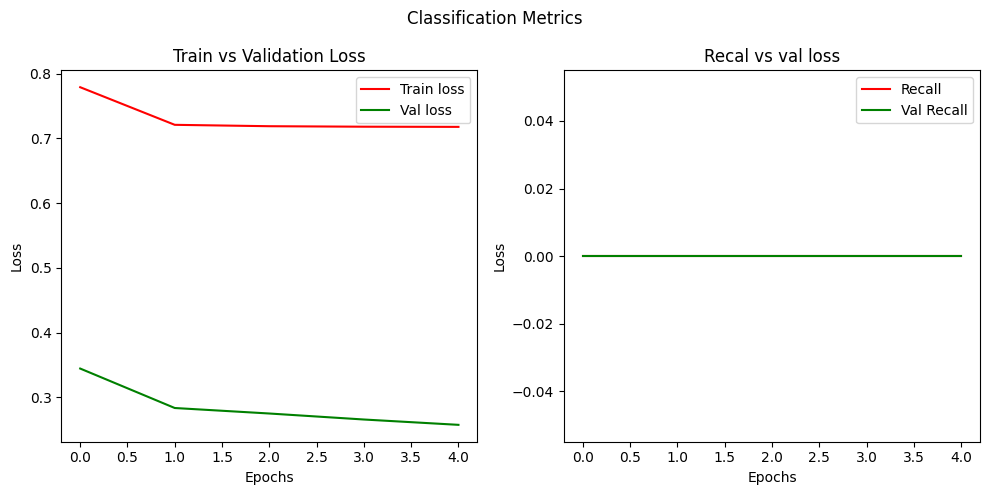

In [83]:
# plot the loss and accuracy
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# We can see from below the loss has decreased while the accuracy has increased.
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
plt.suptitle('Classification Metrics')

ax[0].plot(conv2d_model.history.history['loss'], 'r', conv2d_model.history.history['val_loss'], 'g' )
ax[0].set_title('Train vs Validation Loss')
ax[0].legend(labels=['Train loss', 'Val loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(conv2d_model.history.history['recall_1'], 'r', conv2d_model.history.history['val_recall_1'], 'g' )
ax[1].set_title('Recal vs val loss')
ax[1].legend(labels=['Recall', 'Val Recall'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.tight_layout()

plt.show()

In [84]:
# Evaluate the model
results = conv2d_model.evaluate(x=X_test_pca, y=y_test)
results

1298/1298 [==============================] - 3s 2ms/step - loss: 0.2575 - recall_1: 0.0000e+00 - accuracy: 0.9997


[0.25752806663513184, 0.0, 0.9996868968009949]

In [85]:
# Review the evaluation metrics from a different perspective
dict(zip(conv2d_model.metrics_names, results))

{'loss': 0.25752806663513184, 'recall_1': 0.0, 'accuracy': 0.9996868968009949}

In [86]:
# Define an x for prediction
new_sample = np.array(pca.transform(min_max_scaler.transform( \
    np.array([7110, 1124942, 16527, 1873, 1251154, 1695, 112731], \
                                                                      ndmin=2))), ndmin=3)

# Reshape the sample
new_sample = new_sample.reshape(1, 2,2)
new_sample, new_sample.shape

(array([[[0.01396942, 0.06439457],
         [0.2026917 , 0.00070022]]]),
 (1, 2, 2))

In [87]:
# Predict the number of bytes and the class
# Need to revisit this
#reg_clf_model.predict(x=[ min_max_reg.transform(new_reg_sample), pca.transform( min_max_clf.transform(new_clf_sample))] )
conv2d_model.predict(x=new_sample)


1/1 [==============================] - 0s 89ms/step


array([[0.22662342]], dtype=float32)

In [88]:
# Make predictions on the test data
predictions = conv2d_model.predict(x=X_test_pca)
predictions

1298/1298 [==============================] - 2s 2ms/step


array([[0.22677594],
       [0.22674231],
       [0.22674447],
       ...,
       [0.22674228],
       [0.22674236],
       [0.22674233]], dtype=float32)

In [89]:

# Get the shape of the predictions
predictions.shape, y_test.shape

((41522, 1), (41522,))

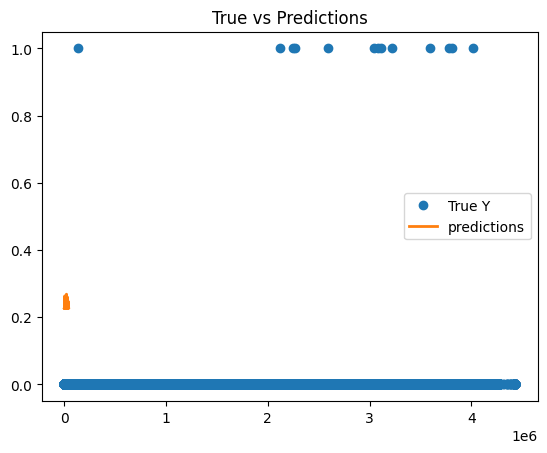

In [90]:
# Above confirms this model is terrible. 
plt.title('True vs Predictions')
plt.plot(y_test, linestyle='', marker='o', label='True Y')
plt.plot(predictions, ls='-', lw=2, label='predictions')
plt.legend(loc='best')

In [91]:
# Grabbing the accuracy score
# Note, we cannot just get the predictions as this would produce continuous values
# Imagine the model is reporting 99% accuracy. 
# Accuracy is misleading here
accuracy_score(y_true=y_test, y_pred=np.round(predictions))

0.9996869129618033

In [92]:
# Print classification report
# print(classification_report(y_true=y_test, y_pred=np.round(predictions)))

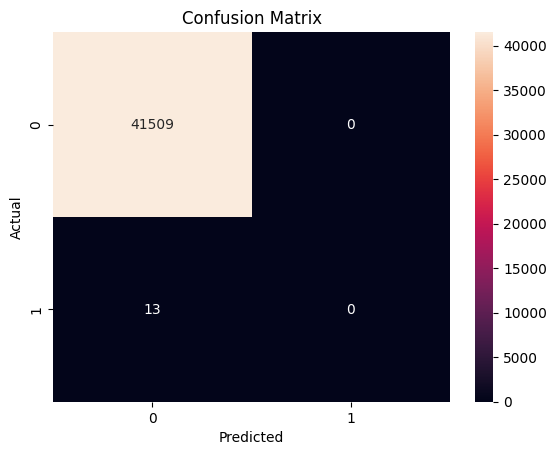

In [93]:
# Looking at the confusion matrix, clearly this model has way too much false positives
# Maybe we can do a better job at setting a different threshold
# However, as said above, we are here for learning purposes
# Most importantly, we are not attempting to solve a classification problem
# This is just to give us insights into what our threshold looks like at present
# To learn more about metrics, see notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=np.round(predictions)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [94]:
# Create the path
PATH = './SAVED_MODELS/TF_CONV_2D/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [95]:
# Save the conv2d models
conv2d_model.save(filepath=f'{PATH}conv2d.h5', overwrite=True)

!dir *.h5 

 Volume in drive D is DATA
 Volume Serial Number is 201E-D9F9

 Directory of d:\ML\BeginningML

2023-05-28  10:33 PM            28,792 conv1d.h5
               1 File(s)         28,792 bytes
               0 Dir(s)  63,141,429,248 bytes free


In [96]:
# Save the model weights
conv2d_model.save_weights(filepath='{PATH}/conv2d-weights', overwrite=True)
!dir *.h5 /b

conv1d.h5


In [97]:
# Save the model a different way
tf.keras.models.save_model(model=conv2d_model, filepath=f'{PATH}new-conv2d', \
                            overwrite=True, include_optimizer=True, save_format='tf')

INFO:tensorflow:Assets written to: ./SAVED_MODELS/TF_CONV_2D/new-conv2d\assets


INFO:tensorflow:Assets written to: ./SAVED_MODELS/TF_CONV_2D/new-conv2d\assets


Additional References and Good reads <br>
https://www.youtube.com/watch?v=WZdxt9xatrY <br>
https://stackoverflow.com/questions/55701788/should-a-1d-cnn-need-padding-to-retain-input-length <br>
https://medium.com/@santi.pdp/how-pytorch-transposed-convs1d-work-a7adac63c4a5 <br>

